# What is Web Scraping

- For researcher: a way to collect unique data


## HTTP

- The Hypertext Transfer Protocol (HTTP) is an application layer protocol for distributed, collaborative, hypermedia information systems. 
- HTTP is the foundation of data communication for the World Wide Web, where hypertext documents include hyperlinks to other resources that the user can easily access, for example by a mouse click or by tapping the screen in a web browser.

- **The client sends requests to the server and the server sends responses.**

![HTTP](https://cdn.ttgtmedia.com/rms/onlineimages/whatis-how_http_works_desktop.png)


### Request Message


- The request message consists of the following:

    + a request line (e.g., GET /images/logo.png HTTP/1.1, which requests a resource called /images/logo.png from the server)
    + request header fields (e.g., Accept-Language: en)
    + an empty line
    + an optional message body


![Request Message](https://documentation.help/DogeTool-HTTP-Requests-vt/http_requestmessageexample.png)


- The request line and other header fields must each end with \<CR\>\<LF \(that is, a carriage return character followed by a line feed character\). The empty line must consist of only \<CR\>\<LF\> and no other whitespace. In the HTTP/1.1 protocol, all header fields except Host are optional.

- A request line containing only the path name is accepted by servers to maintain compatibility with HTTP clients before the HTTP/1.0 specification in RFC 1945.


- Request methods
    + HTTP defines methods to indicate the desired action to be performed on the identified resource.
    + GET: 
        - The GET method requests a representation of the specified resource. Requests using GET should only retrieve data and should have no other effect. The W3C has published guidance principles on this distinction, saying, "Web application design should be informed by the above principles, but also by the relevant limitations." See safe methods below.
    + POST:
        - The POST method requests that the server accept the entity enclosed in the request as a new subordinate of the web resource identified by the URI. The data POSTed might be, for example, an annotation for existing resources; a message for a bulletin board, newsgroup, mailing list, or comment thread; a block of data that is the result of submitting a web form to a data-handling process; or an item to add to a database.
    + DELETE
    + PUT
    + TRACE
    + ...



### Response message
    - a status line which includes the status code and reason message (e.g., HTTP/1.1 200 OK, which indicates that the client's request succeeded)
    - response header fields (e.g., Content-Type: text/html)
    - an empty line
    - an optional message body

    
- HTTP status code: divided into five groups for better explanation of request and responses between client and server as named:

   - Informational 1XX
   - Successful 2XX
   - Redirection 3XX
   - Client Error 4XX (famous 404 in Mainland China)
   - Server Error 5XX
   


## HTTP cookie

   - An HTTP cookie (also called web cookie, Internet cookie, browser cookie, or simply cookie) is a small piece of data stored on the user's computer by the web browser while browsing a website. 
   
   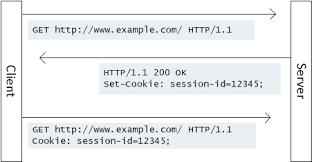
   - Cookies were designed to be a reliable mechanism for websites to **remember stateful information** (such as items added in the shopping cart in an online store) or to **record the user's browsing activity** (including clicking particular buttons, logging in, or recording which pages were visited in the past). 
   - They can also be used to remember pieces of information that the user previously entered into form fields, such as **names, addresses, passwords, and payment card numbers**.



## IP

- What is a Proxy IP? 
    - A proxy server is basically a computer on the internet with its own IP address that your computer knows. 
    - When you send a web request, your request goes to the proxy server first. ... A proxy server can change your IP address, so the web server doesn't know exactly where you are in the world.
    
- VPN vs Proxy: What Are the Main Differences?
    - Like a proxy, a VPN also reroutes your internet traffic through a remote server and hides your IP address so websites can't see your original IP or location. 
    - However, VPN works on the operating system level, meaning that it redirects all your traffic, whether it's coming from your browser or a background app.




## CAPTCHA

 - A CAPTCHA (/kæp.tʃə/, a contrived acronym for "Completely Automated Public Turing test to tell Computers and Humans Apart") is a type of challenge–response test used in computing to determine whether or not the user is human.
 
 
 - Examples
 
  ![Robot](https://blog-cloudflare-com-assets.storage.googleapis.com/2020/04/image3-4.png)


  ![RobotA](https://www.checkmarket.com/wp-content/uploads/2019/12/survey-captcha-example.png)


## Conclusion
   - work flow for highly anti-scrapping website: 
       - First, figure out where the data is coming from.
           - get?
           - post?
           - which url?
           - what are the parameters?
           
       - Second, figure out the answer for the following questions:
           - Does the website block IP?
           - Does the website need unexpired cookies to get the data?
           - Does the website pops up CAPTCHA if request frequently?
           - Does the response data is encrypted?

       - Third
           - if it block frequent IP: build a IP Proxy Pool, for each request within a certain interval of time, assign a unique IP 
           - If need cookies, figure out a way to get cookies (register a set of account and use selenium to simulate a normal log-in and get the cookies). Form a cookies pool, write a random assignment function and for each request, use a random cookie from cookies pool.
           - For CAPTCHA
               - write crack codes
               - use API services for a third-party company (For Mainland: )
               
           - Decrypt data is usually very difficult, need to read the JavaScript codes on the website or some common knowledge on different ways of encrypting data.







# Examples: 
  
  - GET Method: US patent records(http://patft.uspto.gov/) 
  - POST Method: Hong Kong house transactions (https://data.28hse.com/en/)


## US patent records(http://patft.uspto.gov/) 


In [23]:
"""
@purpose: collect the number of patents for each query
@author: wenwei peng
@contact: wpengad@ust.hk
@time: 2020-09-23
"""
import urllib
import requests
import time
from bs4 import BeautifulSoup
import pandas as pd
from multiprocessing import Pool
import re

def gen_query():
    query = []
    for st in ['CN','KR','JP','DE','TW','HK','SG']:
        for year in range(1976,2019):
            query.append('ISD/{0} AND ABST/(method or process) AND ACN/{1}'.format(year,st))
    return query

def gen_query_all():
    lists = pd.read_csv("CityBoundaries.txt")
    #print(lists['Name'],lists['St'])
    query = []
    for st in lists['St']:
        for year in range(1976,2019):
            query.append('ISD/1/1/{0} AND AS/{1}'.format(year,st))
    return query


def get_num(query):
    headers = {
        'ccept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3',
        'Accept-Encoding': 'gzip, deflate',
        'Accept-Language': 'en-US,en;q=0.9,zh-CN;q=0.8,zh;q=0.7,zh-TW;q=0.6',
        'Connection': 'keep-alive',
        'Host': 'patft.uspto.gov',
        'Referer': 'http://patft.uspto.gov/netahtml/PTO/search-adv.htm',
        'Upgrade-Insecure-Requests': '1',
        'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_14_2) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/71.0.3578.98 Safari/537.36'
    }

    param_list= {
        'Sect1': 'PTO2',
        'Sect2': 'HITOFF',
        'u': '/netahtml/PTO/search-adv.htm',
        'r': '0',
        'p': '1',
        'f': 'S',
        'l': '50',
        'Query': query,
        'd': 'PTXT'
    }
    url = 'http://patft.uspto.gov/netacgi/nph-Parser?' + urllib.parse.urlencode(param_list)
    try:
        web_data = requests.get(url, headers = headers)
        if web_data.status_code != 200:
            f = open('Badlist.txt','a',encoding='utf-8',errors='ignore') 
            f.write('query:{0}'.format(query) + "\n")
            f.close()
            pass

        else:
            if 'No patents have matched your query'in web_data.text:
                out = 0
            elif 'Single Document' in web_data.text:
                out = 1
            else:
                out = re.findall('''<strong>(.*?)</strong>''',web_data.text.lower().strip().replace("\n",""))

            print(query,"=>>>",out)
            f = open('./US_Patent/Output/Query_Count_By_State_Year.txt','a',encoding='utf-8',errors='ignore') 
            f.write('query:{0}; num:{1};'.format(query,out) + "\n")
            f.close()

    except Exception as e:
        print(e)
        f = open('Badlist.txt','a',encoding='utf-8',errors='ignore') 
        f.write('query:{0}'.format(query) + "\n")
        f.close()
        pass



query_list = gen_query()
for query in query_list:
    get_num(query)


ISD/1976 AND ABST/(method or process) AND ACN/CN =>>> 0
ISD/1977 AND ABST/(method or process) AND ACN/CN =>>> 0
ISD/1978 AND ABST/(method or process) AND ACN/CN =>>> 0
ISD/1979 AND ABST/(method or process) AND ACN/CN =>>> 0
ISD/1980 AND ABST/(method or process) AND ACN/CN =>>> 0
ISD/1981 AND ABST/(method or process) AND ACN/CN =>>> 0
ISD/1982 AND ABST/(method or process) AND ACN/CN =>>> 0


KeyboardInterrupt: 

## Hong Kong house transactions (https://data.28hse.com/en/)

In [3]:
import requests
import json
import csv

url = "https://data.28hse.com/en/webservice"

for page in range(1,2):
    start = (page-1)*10
    payload = {
        'draw':str(page),
        'columns[0][data]':'date',
        "columns[0][name]":"",
        'columns[0][searchable]':'true',
        'columns[0][orderable]':'false',
        'columns[0][search][value]':'',
        'columns[0][search][regex]':'false',
        'columns[1][data]':'catfathername',
        'columns[1][name]':'',
        'columns[1][searchable]':'true',
        'columns[1][orderable]':'false',
        'columns[1][search][value]':'',
        'columns[1][search][regex]':'false',
        'columns[2][data]':'catname',
        'columns[2][name]':'',
        'columns[2][searchable]':'true',
        'columns[2][orderable]':'false',
        'columns[2][search][value]':'',
        'columns[2][search][regex]':'false',
        'columns[3][data]':'price',
        'columns[3][name]':'',
        'columns[3][searchable]':'true',
        'columns[3][orderable]':'false',
        'columns[3][search][value]':'',
        'columns[3][search][regex]':'false',
        'columns[4][data]':'winloss',
        'columns[4][name]':'',
        'columns[4][searchable]':'true',
        'columns[4][orderable]':'false',
        'columns[4][search][value]':'',
        'columns[4][search][regex]':'false',
        'columns[5][data]':'area',
        'columns[5][name]':'',
        'columns[5][searchable]':'true',
        'columns[5][orderable]':'false',
        'columns[5][search][value]':'',
        'columns[5][search][regex]':'false',
        'columns[6][data]':'sq_price',
        'columns[6][name]':'',
        'columns[6][searchable]':'true',
        'columns[6][orderable]':'false',
        'columns[6][search][value]':'',
        'columns[6][search][regex]':'false',
        'columns[7][data]':'addr',
        'columns[7][name]':'',
        'columns[7][searchable]':'true',
        'columns[7][orderable]':'false',
        'columns[7][search][value]':'',
        'columns[7][search][regex]':'false',
        'columns[8][data]':'contract',
        'columns[8][name]':'',
        'columns[8][searchable]':'true',
        'columns[8][orderable]':'false',
        'columns[8][search][value]':'',
        'columns[8][search][regex]':'false',
        'columns[9][data]':'addr',
        'columns[9][name]':'',
        'columns[9][searchable]':'true',
        'columns[9][orderable]':'false',
        'columns[9][search][value]':'',
        'columns[9][search][regex]':'false',
        'start':str(start),
        'length':'10',
        'search[value]':'',
        'search[regex]':'false',
        'cmd':'area_deals',
        'area_id':'3' # NT
    }

    wb_data = requests.post(url, data= payload)
    print('--------------')
    print('page: ', str(page))
    data= wb_data.text
    data = json.loads(data)
    print(data)
    

--------------
page:  1
{'recordsTotal': '1119799', 'recordsFiltered': '1119799', 'lastPage': 111980, 'data': [{'date': '2020-09-22', 'withpre': 1, 'id': '1401284', 'rootid': '3', 'fatherid': '110', 'catid': '4426', 'catname': 'Sun Tuen Mun Centre', 'catfathername': 'Tuen Mun', 'url_father': 'https://data.28hse.com/en/nt/tuen-mun', 'url_cat': 'https://data.28hse.com/en/nt/tuen-mun/4426_sun-tuen-mun-centre', 'source': 'Land Registry', 'contract': 'Agreement', 'memo': '20092202270015', 'price': '$5.6M', 'price_value': '5600000', 'holddate': '8 years 139 days', 'winloss_flag': 1, 'winloss': '180%', 'act_area': '501ft<sup>2</sup>', 'area': '620ft<sup>2</sup>', 'arearaw': '620', 'sq_price': '$9032', 'sq_price_value': 9032.26, 'sq_actprice': '$11178', 'sq_actprice_value': 11177.64, 'month': 'Sep', 'day': '22', 'date_dm': '22/09', 'date_y': '2020', 'block': 'BLOCK 1', 'state': None, 'floor': '3#', 'room': 'D', 'addr': 'BLOCK 1 3#/F Room D'}, {'date': '2020-09-22', 'withpre': 1, 'id': '1401283

In [4]:
# check what is the strcture of response json
for item in data:
    print(item)

recordsTotal
recordsFiltered
lastPage
data


In [13]:
for item in data:
    print("==="*20)
    print(item,':', data[item])

recordsTotal : 1119799
recordsFiltered : 1119799
lastPage : 111980
data : [{'date': '2020-09-22', 'withpre': 1, 'id': '1401284', 'rootid': '3', 'fatherid': '110', 'catid': '4426', 'catname': 'Sun Tuen Mun Centre', 'catfathername': 'Tuen Mun', 'url_father': 'https://data.28hse.com/en/nt/tuen-mun', 'url_cat': 'https://data.28hse.com/en/nt/tuen-mun/4426_sun-tuen-mun-centre', 'source': 'Land Registry', 'contract': 'Agreement', 'memo': '20092202270015', 'price': '$5.6M', 'price_value': '5600000', 'holddate': '8 years 139 days', 'winloss_flag': 1, 'winloss': '180%', 'act_area': '501ft<sup>2</sup>', 'area': '620ft<sup>2</sup>', 'arearaw': '620', 'sq_price': '$9032', 'sq_price_value': 9032.26, 'sq_actprice': '$11178', 'sq_actprice_value': 11177.64, 'month': 'Sep', 'day': '22', 'date_dm': '22/09', 'date_y': '2020', 'block': 'BLOCK 1', 'state': None, 'floor': '3#', 'room': 'D', 'addr': 'BLOCK 1 3#/F Room D'}, {'date': '2020-09-22', 'withpre': 1, 'id': '1401283', 'rootid': '3', 'fatherid': '107',

In [14]:
for item in data:
    if item == 'data' :
        for record in data[item]:
            print(record)
            print("###"*20)

{'date': '2020-09-22', 'withpre': 1, 'id': '1401284', 'rootid': '3', 'fatherid': '110', 'catid': '4426', 'catname': 'Sun Tuen Mun Centre', 'catfathername': 'Tuen Mun', 'url_father': 'https://data.28hse.com/en/nt/tuen-mun', 'url_cat': 'https://data.28hse.com/en/nt/tuen-mun/4426_sun-tuen-mun-centre', 'source': 'Land Registry', 'contract': 'Agreement', 'memo': '20092202270015', 'price': '$5.6M', 'price_value': '5600000', 'holddate': '8 years 139 days', 'winloss_flag': 1, 'winloss': '180%', 'act_area': '501ft<sup>2</sup>', 'area': '620ft<sup>2</sup>', 'arearaw': '620', 'sq_price': '$9032', 'sq_price_value': 9032.26, 'sq_actprice': '$11178', 'sq_actprice_value': 11177.64, 'month': 'Sep', 'day': '22', 'date_dm': '22/09', 'date_y': '2020', 'block': 'BLOCK 1', 'state': None, 'floor': '3#', 'room': 'D', 'addr': 'BLOCK 1 3#/F Room D'}
############################################################
{'date': '2020-09-22', 'withpre': 1, 'id': '1401283', 'rootid': '3', 'fatherid': '107', 'catid': '4344

In [18]:
for item in data:
    if item == 'data' :
        for record in data[item]:
            print("###"*20)
            for key in record:
                print(key,':',record[key])
                print("---"*20)

############################################################
date : 2020-09-22
------------------------------------------------------------
withpre : 1
------------------------------------------------------------
id : 1401284
------------------------------------------------------------
rootid : 3
------------------------------------------------------------
fatherid : 110
------------------------------------------------------------
catid : 4426
------------------------------------------------------------
catname : Sun Tuen Mun Centre
------------------------------------------------------------
catfathername : Tuen Mun
------------------------------------------------------------
url_father : https://data.28hse.com/en/nt/tuen-mun
------------------------------------------------------------
url_cat : https://data.28hse.com/en/nt/tuen-mun/4426_sun-tuen-mun-centre
------------------------------------------------------------
source : Land Registry
---------------------------------------------

## Multiprocessing

- Python Multiprocessing Tutorial: Run Code in Parallel Using the Multiprocessing Module
